## Numeric basic

In [1]:
import numpy as np

In [2]:
x = np.array([1,2,3,4,5,6])

In [4]:
x_reshape = x.reshape((2,3)) # two rows, 3 columns, each row is a variable, each column is a observation

In [5]:
x_reshape # row major ordering

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
x_reshape.T #3 rows, 2 column

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
rng = np.random.default_rng(3)
X = rng.standard_normal((10,3)) #row based, 10 variable, 3 observations

In [9]:
X

array([[ 2.04091912, -2.55566503,  0.41809885],
       [-0.56776961, -0.45264929, -0.21559716],
       [-2.01998613, -0.23193238, -0.86521308],
       [ 3.32299952,  0.22578661, -0.35263079],
       [-0.28128742, -0.66804635, -1.05515055],
       [-0.39080098,  0.48194539, -0.23855361],
       [ 0.9577587 , -0.19980213,  0.02425957],
       [ 1.54582085,  0.54510552, -0.50522874],
       [-0.18283897,  0.54052513,  1.93508803],
       [-0.26962033, -0.24355868,  1.0023136 ]])

In [11]:
X.mean() #generate mean of overall

0.05814298935112294

In [12]:
X.mean(axis =0) #row based, 3 column for each row, thus three output

array([ 0.41551948, -0.25582912,  0.01473861])

In [13]:
X.mean(axis =1)

array([-0.03221569, -0.41200535, -1.03904386,  1.06538511, -0.66816144,
       -0.0491364 ,  0.26073871,  0.52856588,  0.76425806,  0.16304486])

## Graphical basic

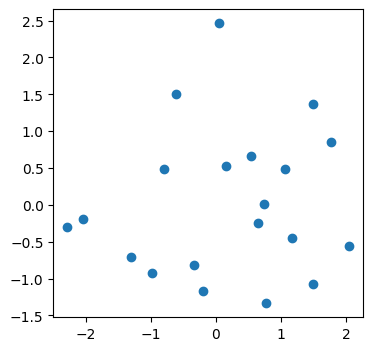

In [17]:
from matplotlib.pyplot import subplots
fig,ax = subplots(figsize=(4,4))
x = rng.standard_normal(20)
y = rng.standard_normal(20)
ax.plot(x,y,'o')

Text(0.5, 1.0, 'plot of x vs y')

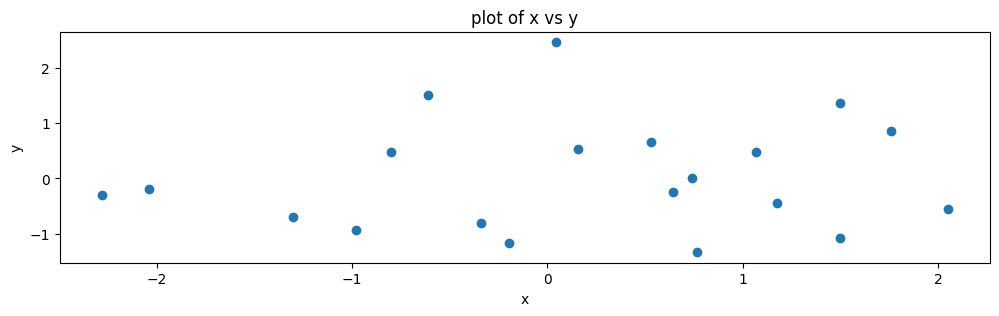

In [25]:
fig,ax = subplots()
fig.set_size_inches(12,3) ##same using figsize insteal
ax.scatter(x,y,marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('plot of x vs y')

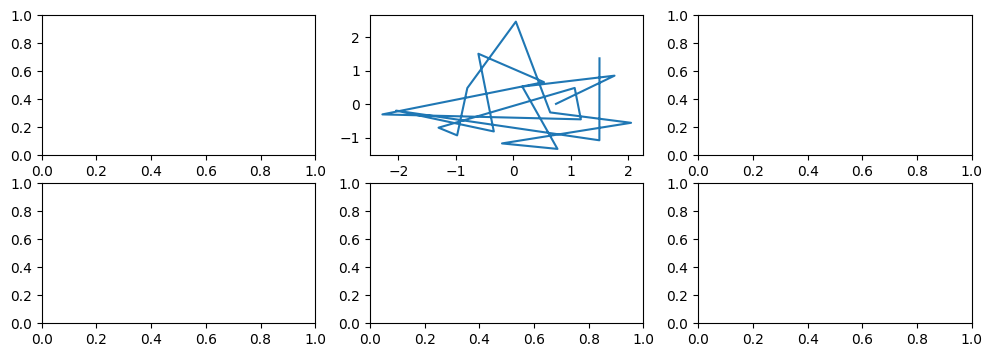

In [35]:
fig,axes = subplots(nrows=2,ncols=3,figsize=(12,4))
axes[0,1].plot(x,y)

In [ ]:
#fig.savefig(xxx.png,dpi=200)

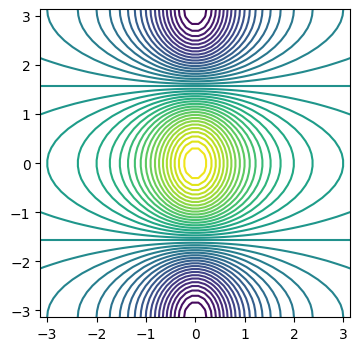

In [37]:
fig,ax = subplots(figsize = (4,4))
x = np.linspace(-np.pi,np.pi,50)
y = x
f = np.multiply.outer(np.cos(y),1/(1+x**2))
ax.contour(x,y,f,levels=45)

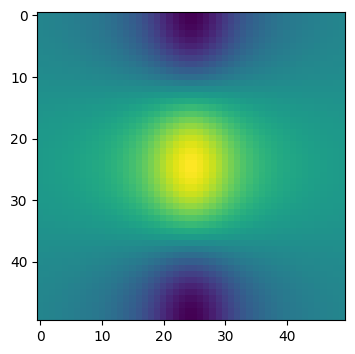

In [43]:
fig,ax = subplots(figsize = (4,4))
x = np.linspace(-np.pi,np.pi,50)
y = x
f = np.multiply.outer(np.cos(y),1/(1+x**2))
ax.imshow(f)

## Indexing basic

In [44]:
A = np.array(np.arange(16).reshape(4,4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
## submatrix comprised of the 2&4 rows and the 1,3,4 columns


In [45]:
idx = np.ix_([1,3],[0,2,3])
A[idx]

array([[ 4,  6,  7],
       [12, 14, 15]])

In [46]:
A.shape[0]

4

In [49]:
keep_rows = np.array([0,1,0,1])
A[keep_rows]

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

In [54]:
keep_rows = np.zeros(A.shape[0],bool)
keep_rows[[1,3]]=True
A[keep_rows]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

## Dataset basic

In [59]:
import pandas as pd

In [55]:
from ISLP import load_data
Auto = load_data('Auto')
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [63]:
Auto_re = Auto.set_index('name')

In [64]:
Auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [65]:
Auto_re.iloc[[3,4],[0,2,3]]

,mpg,displacement,horsepower
name,,,
amc rebel sst,16.0,304.0,150
ford torino,17.0,302.0,140


In [67]:
Auto_re.loc[lambda df:(df['year']>80)
&(df.index.str.contains('ford')
|df.index.str.contains('datsun')),

['weight','origin']]

,weight,origin
name,,
datsun 210 mpg,1975,3
ford escort 4w,2045,1
ford escort 2h,2380,1
datsun 200sx,2615,3
datsun 810 maxima,2930,3
ford granada gl,3060,1
ford fairmont futura,2865,1
datsun 310 gx,1995,3
ford granada l,2835,1


In [68]:
total = 0
for value,weight in zip([2,3,19],[0.2,0.3,0.5]):
    total += weight * value
print('weighted avg is: {0}'.format(total))

weighted avg is: 10.8


In [69]:
## create a fake dataframe
rng = np.random.default_rng(1)
A = rng.standard_normal((127,5)) #127rows, 5 columns
M = rng.choice([0,np.nan],p=[0.8,0.2],size=A.shape)
A += M
D = pd.DataFrame(A,columns = ['food','bar','pickle','snack','popcorn'])

In [70]:
D[:3]

,food,bar,pickle,snack,popcorn
0,0.345584,0.821618,0.330437,-1.303157,NaN
1,NaN,-0.536953,0.581118,0.364572,0.294132
2,NaN,0.546713,NaN,-0.162910,-0.482119


In [73]:
## {1:.2%} is very frequently used
for col in D.columns:
    template = 'Column "{0}" has {1:.2%} missing values'
    print(template.format(col,np.isnan(D[col]).mean()))


Column "food" has 16.54% missing values
Column "bar" has 25.98% missing values
Column "pickle" has 29.13% missing values
Column "snack" has 21.26% missing values
Column "popcorn" has 22.83% missing values


In [74]:
Auto.cylinders = pd.Series(Auto.cylinders,dtype='category')

In [75]:
Auto.cylinders.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False)

<Axes: title={'center': 'mpg'}, xlabel='cylinders'>

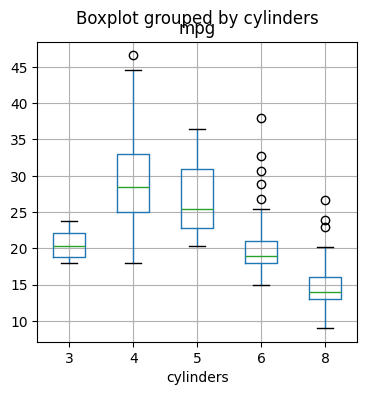

In [77]:
fig,ax =subplots(figsize=(4,4))
Auto.boxplot('mpg',by='cylinders',ax=ax)

array([<Axes: title={'center': 'mpg'}>], dtype=object)

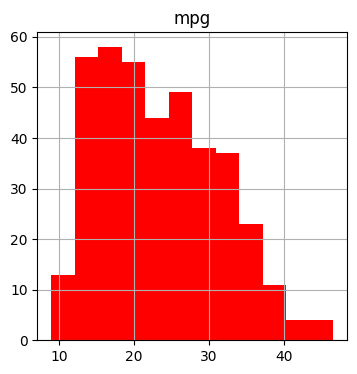

In [80]:
fig,ax =subplots(figsize=(4,4))
Auto.hist('mpg',color='red',bins=12,ax=ax)

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='horsepower', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='acceleration', ylabel='displacement'>,
        <Axes: xlabel='year', ylabel='displacement'>,
        <Axes: xlabel='origin', ylabel='displacement'>],
       [<Axes: xlabel='mpg', ylabel='horsepower'>,
        <Axes: xlabel='displacement', ylabel='horsepower'>,
        <Axes: xlabel='horsepower', ylabel='horsepower'>,
        <Axes: xlabel='weight', ylabel='horsepower'>,
        <Axes: xlabel='accelerat

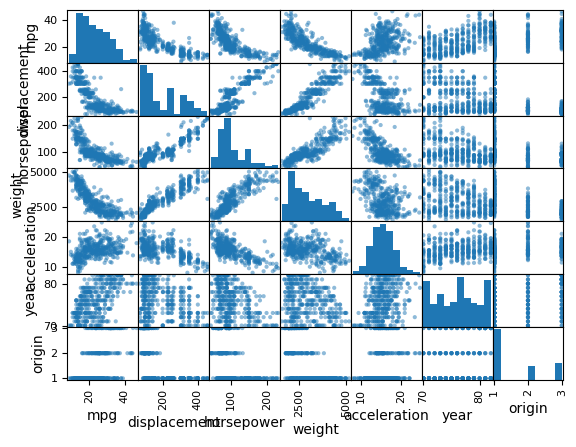

In [81]:
pd.plotting.scatter_matrix(Auto)

## Applied exercise

In [82]:
from ISLP import load_data
College = load_data('College')

In [83]:
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [84]:
college = College

In [86]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

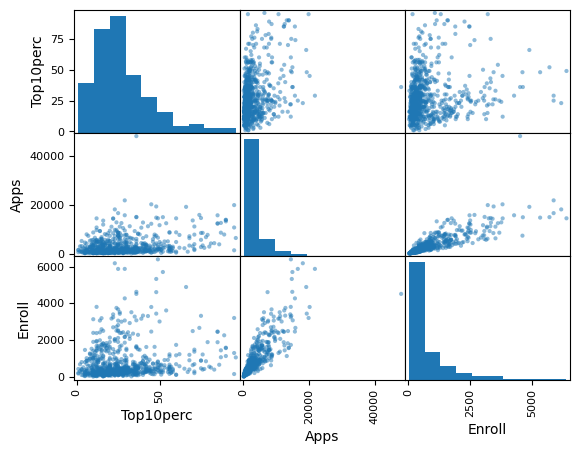

In [87]:
pd.plotting.scatter_matrix(college[['Top10perc','Apps','Enroll']])

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

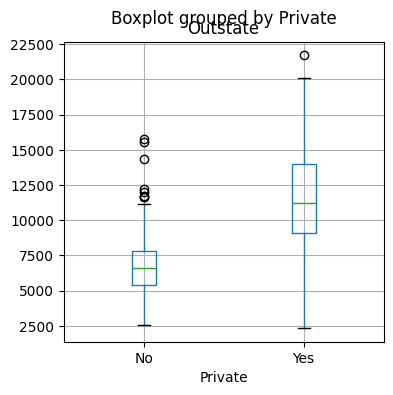

In [89]:
fig,ax =subplots(figsize=(4,4))
college.boxplot('Outstate',by='Private',ax=ax)

In [93]:
college['Elite']=pd.cut(college['Top10perc'],[0,50,100],labels=['No','Yes']) 

In [94]:
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

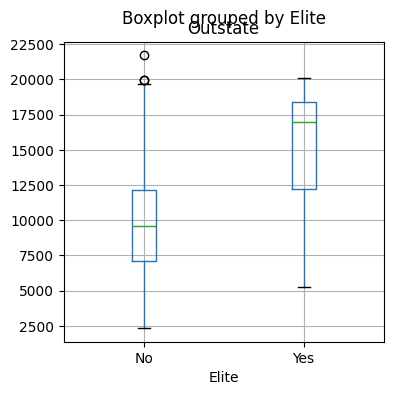

In [95]:
fig,ax =subplots(figsize=(4,4))
college.boxplot('Outstate',by='Elite',ax=ax)

(array([754.,  18.,   4.,   0.,   1.]),
 array([1.0000e+00, 4.3680e+03, 8.7350e+03, 1.3102e+04, 1.7469e+04,
        2.1836e+04]),
 <BarContainer object of 5 artists>)

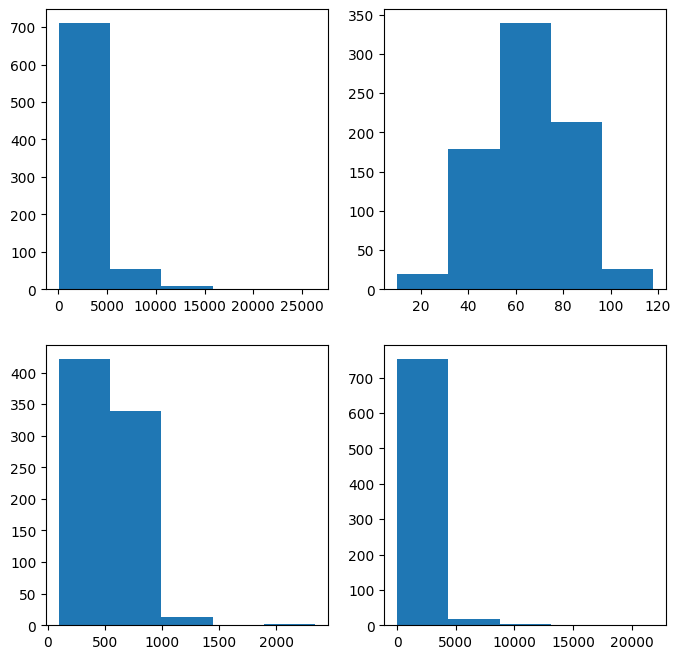

In [107]:
fig,ax =subplots(figsize=(8,8),nrows=2,ncols=2)
ax[0,0].hist(college['Accept'],bins=5)
ax[0,1].hist(college['Grad.Rate'],bins=5)
ax[1,0].hist(college['Books'],bins=5)
ax[1,1].hist(college['P.Undergrad'],bins=5)